In [7]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

# Directory:
dir = 'not-flipped/'
# dir = 'flipped/'

# Load data from output txt file:
data = np.loadtxt(dir+'det.txt')

In [8]:
# Values from detector:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []
EventIDs = []
for i in range(data.shape[0]):
    x_vals.append(data[i][0]*0.1) # mm -> cm
    y_vals.append(data[i][1]*0.1)
    z_vals.append(data[i][2]*0.1)
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    t = data[i][6]
    t_vals.append(t) # ns
    EventIDs.append(data[i][8])
    del px, py, pz, t

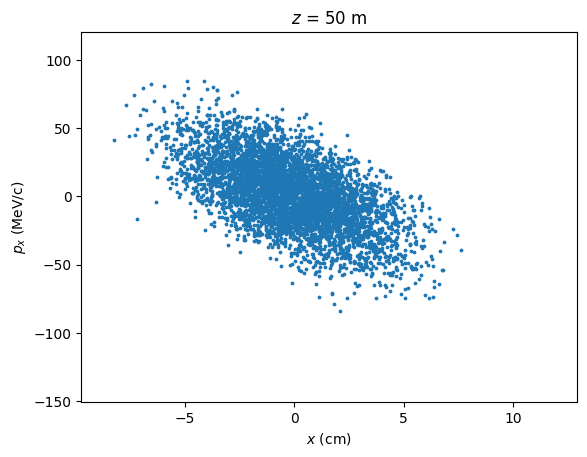

In [9]:
# Animate phase space (x) evolution along z:
unique_z = np.unique(z_vals)
data_by_z = []
for z in unique_z:
    temp_x = [x for x, z_val in zip(x_vals, z_vals) if z_val == z]
    temp_px = [px for px, z_val in zip(px_vals, z_vals) if z_val == z]
    data_by_z.append((temp_x, temp_px))
fig, ax = plt.subplots()
sc = ax.scatter([], [], s=3)
ax.set_xlim(np.min(x_vals), np.max(x_vals))
ax.set_ylim(np.min(px_vals), np.max(px_vals))
ax.set_xlabel('$x$ (cm)')
ax.set_ylabel('$p_x$ (MeV/c)')
title = ax.set_title("")
def update(frame):
    x, px = data_by_z[frame]
    sc.set_offsets(np.column_stack((x, px)))
    title.set_text(f'$z$ = {int(unique_z[frame])} m')
    return sc, title
ani = FuncAnimation(fig, update, frames=len(unique_z), interval=500, blit=False)
ani.save(dir+'phase_space_x_animation.gif', writer='pillow')

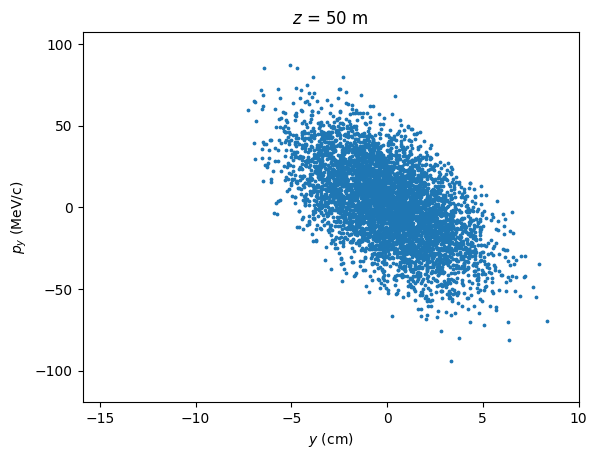

In [10]:
# Animate phase space (y) evolution along z:
unique_z = np.unique(z_vals)
data_by_z = []
for z in unique_z:
    temp_y = [y for y, z_val in zip(y_vals, z_vals) if z_val == z]
    temp_py = [py for py, z_val in zip(py_vals, z_vals) if z_val == z]
    data_by_z.append((temp_y, temp_py))
fig, ax = plt.subplots()
sc = ax.scatter([], [], s=3)
ax.set_xlim(np.min(y_vals), np.max(y_vals))
ax.set_ylim(np.min(py_vals), np.max(py_vals))
ax.set_xlabel('$y$ (cm)')
ax.set_ylabel('$p_y$ (MeV/c)')
title = ax.set_title("")
def update(frame):
    y, py = data_by_z[frame]
    sc.set_offsets(np.column_stack((y, py)))
    title.set_text(f'$z$ = {int(unique_z[frame])} m')
    return sc, title
ani = FuncAnimation(fig, update, frames=len(unique_z), interval=500, blit=False)
ani.save(dir+'phase_space_y_animation.gif', writer='pillow')

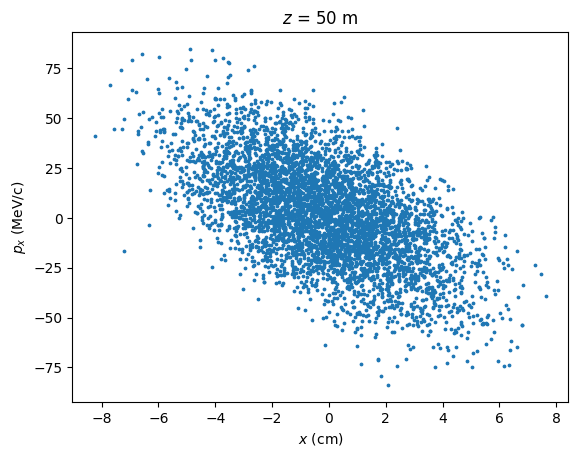

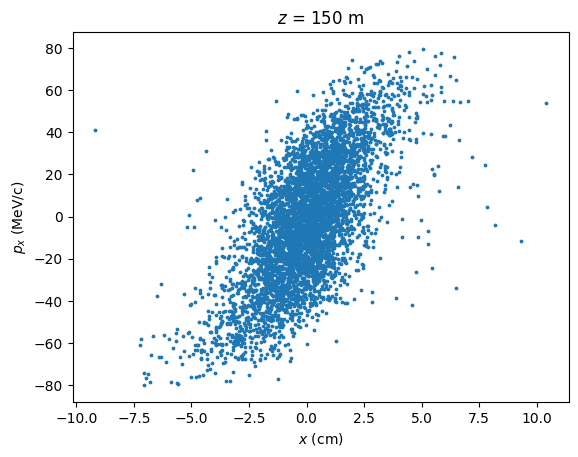

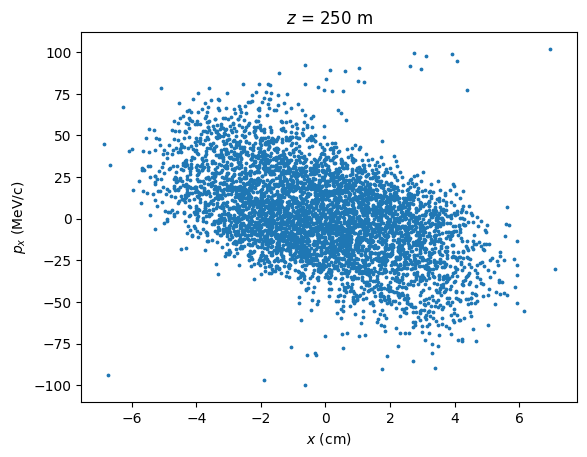

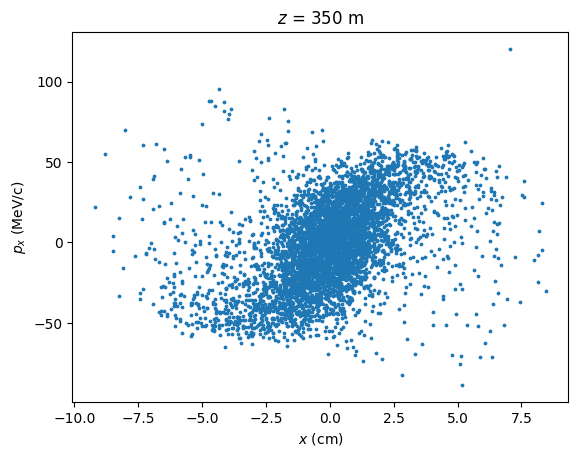

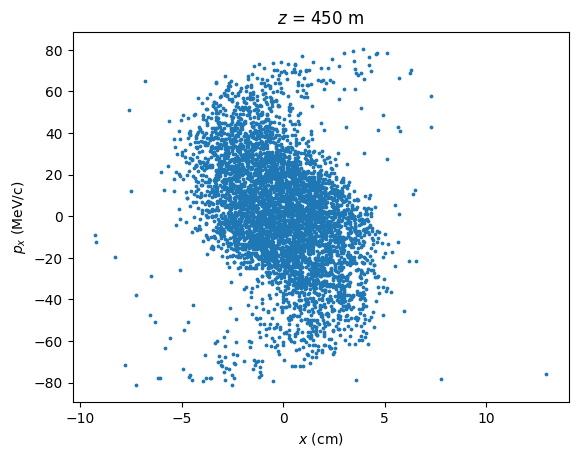

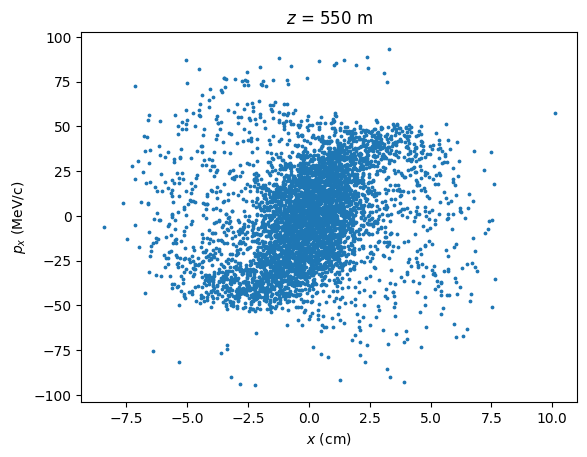

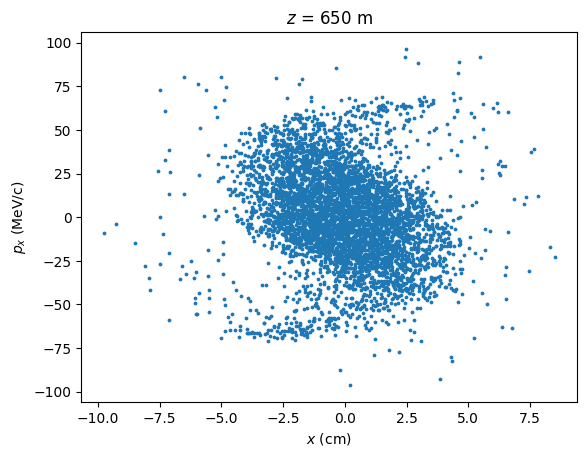

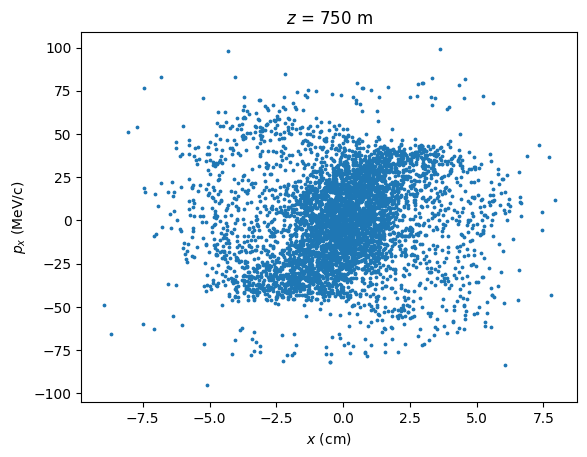

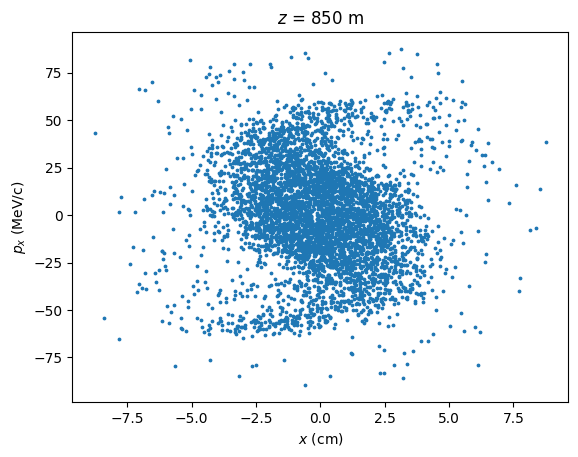

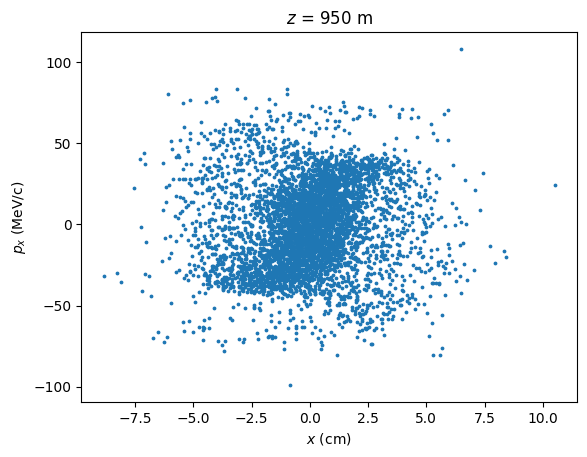

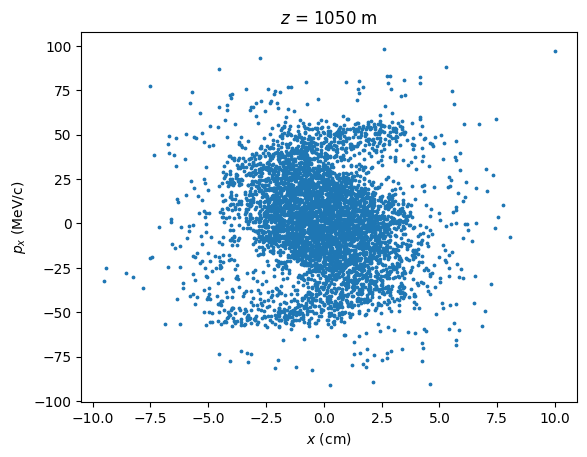

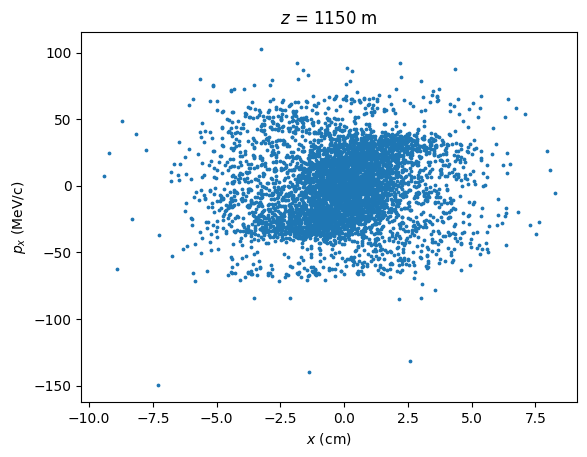

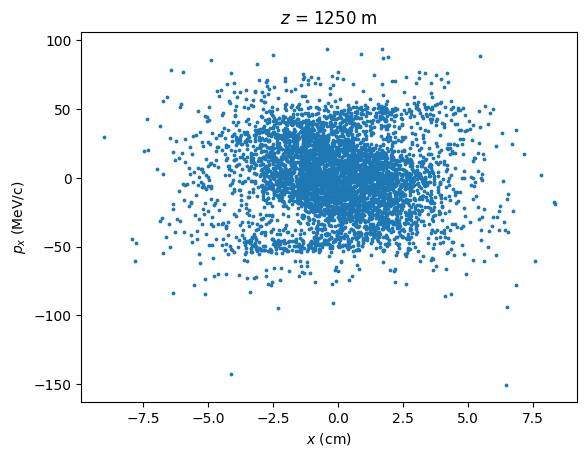

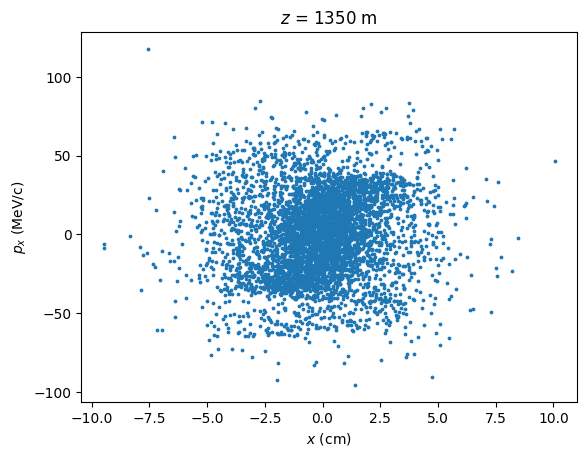

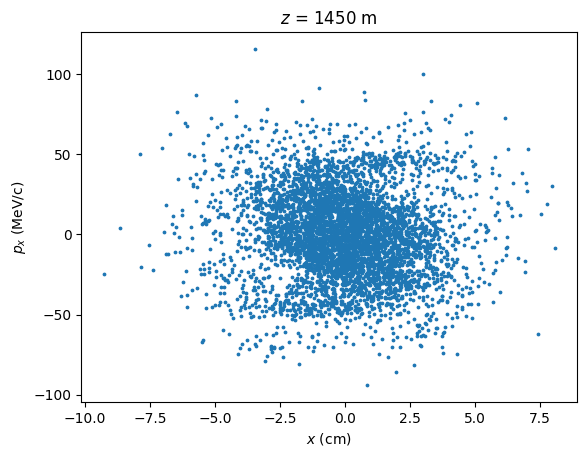

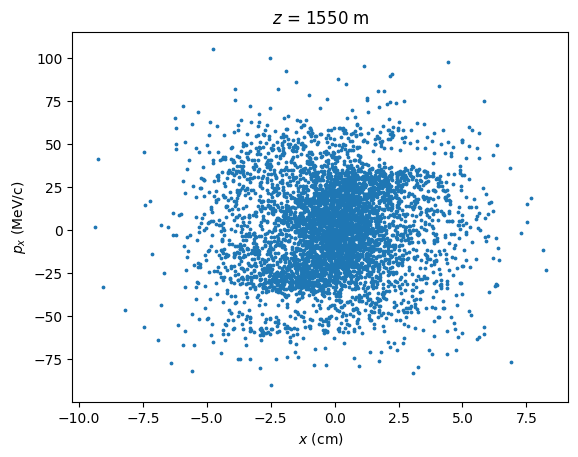

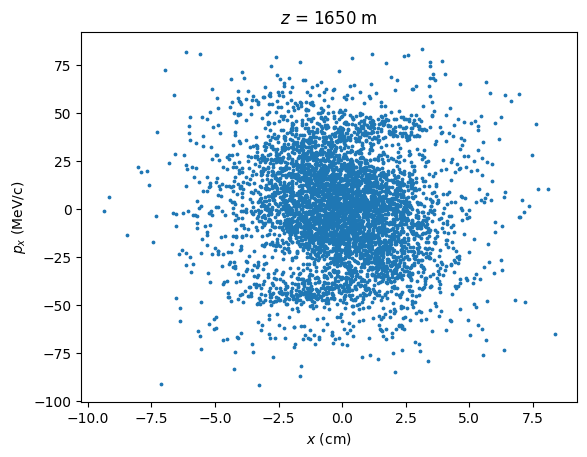

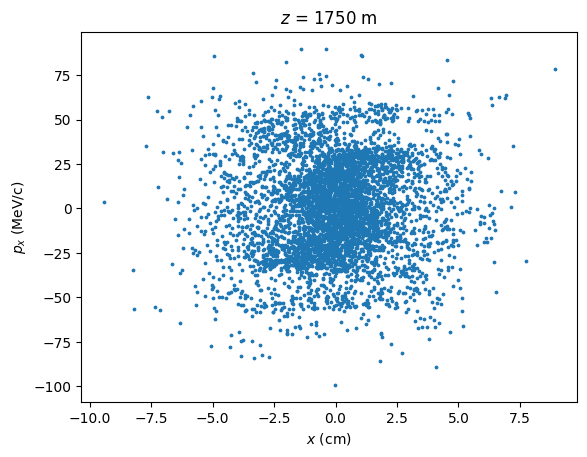

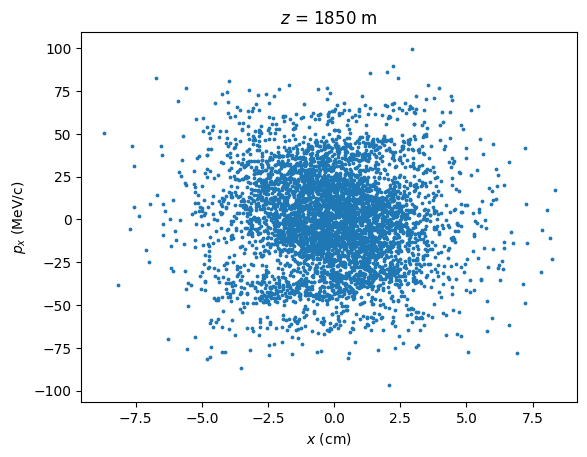

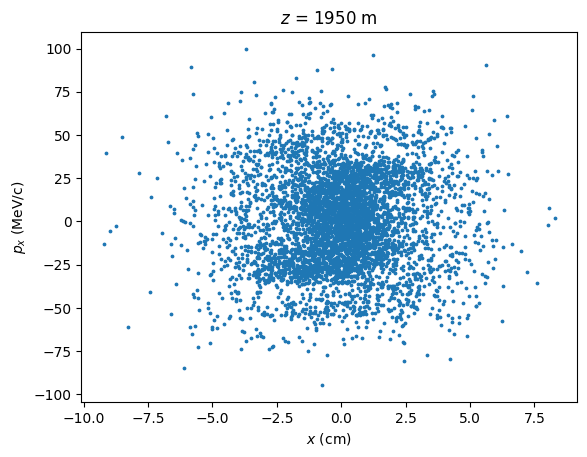

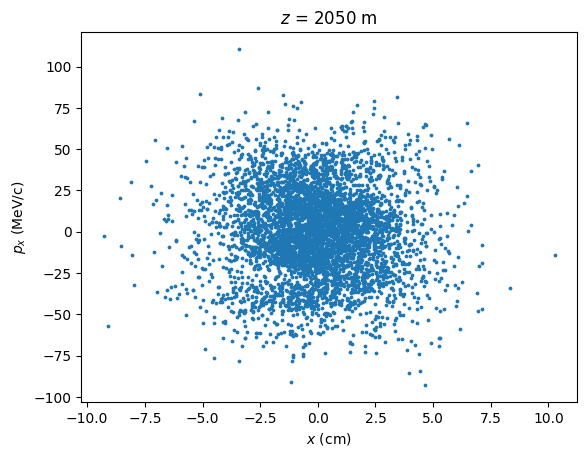

In [11]:
# Plot phase space (x) distribution for each detector location along beamline:
unique_z = np.unique(z_vals)
for i in range(len(unique_z)):
    temp_x = []; temp_px = []
    for j in range(len(z_vals)):
        if z_vals[j] == unique_z[i]:
            temp_x.append(x_vals[j])
            temp_px.append(px_vals[j])
    plt.scatter(temp_x,temp_px,s=3)
    plt.xlabel('$x$ (cm)')
    plt.ylabel('$p_x$ (MeV/c)')
    plt.title(f'$z$ = {int(unique_z[i])} m')
    plt.show()

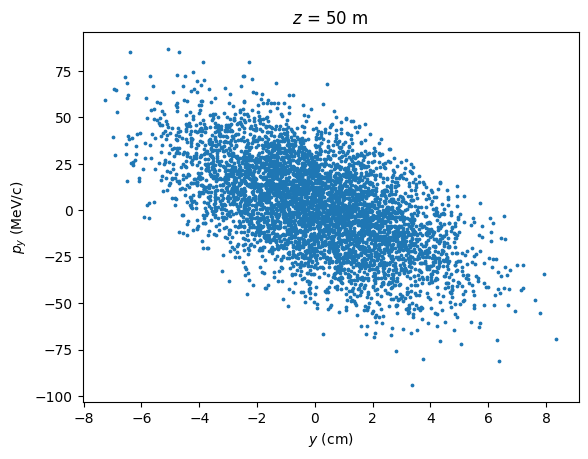

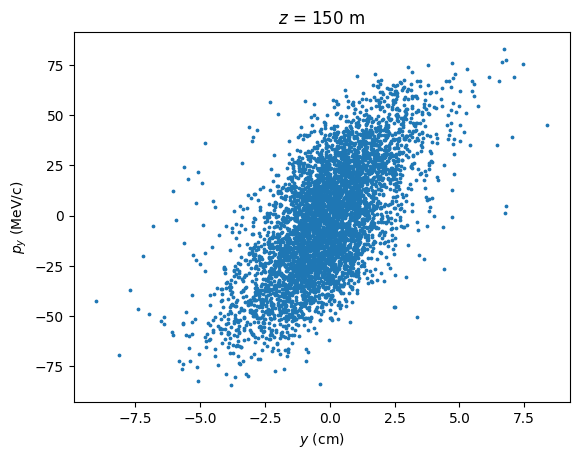

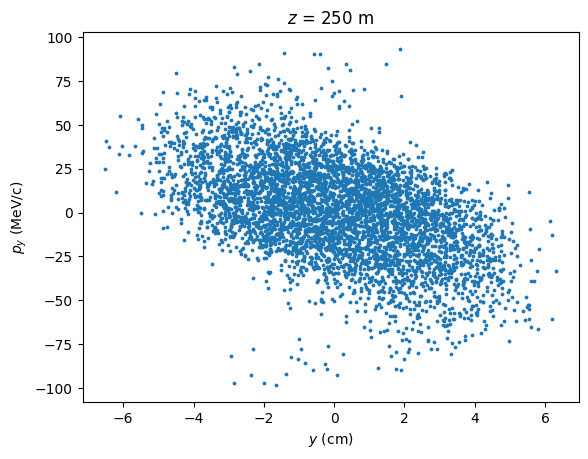

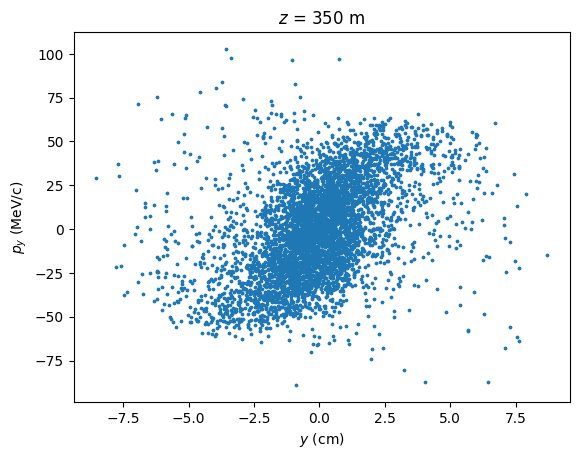

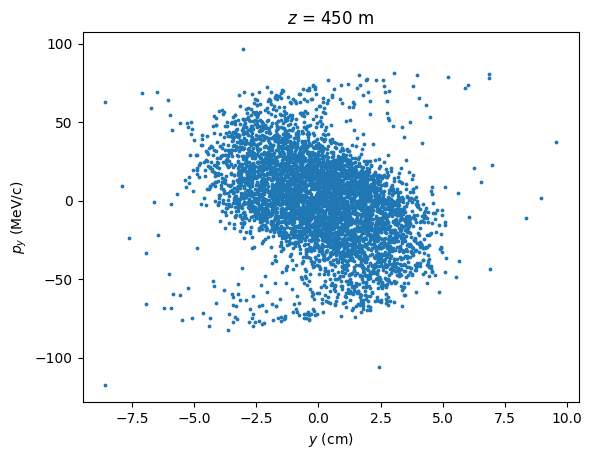

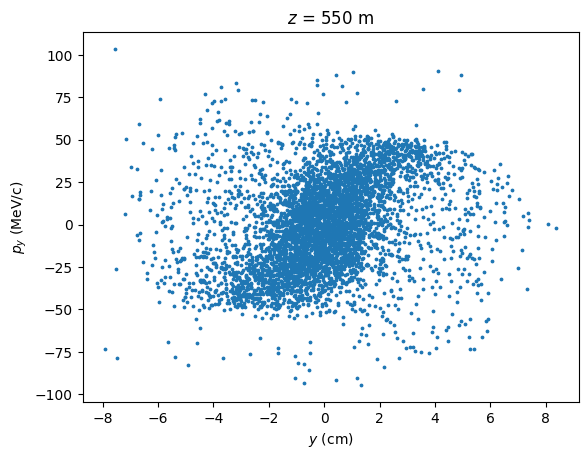

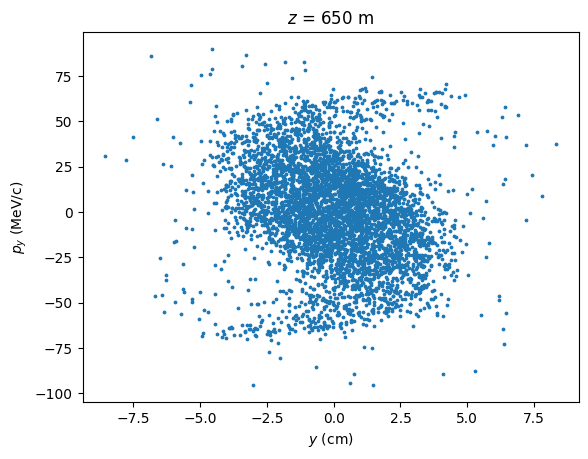

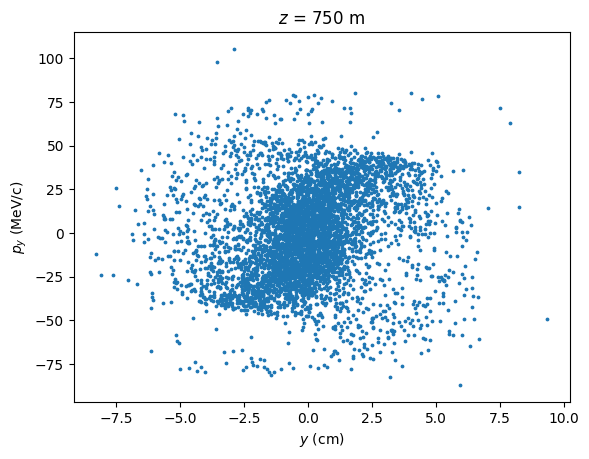

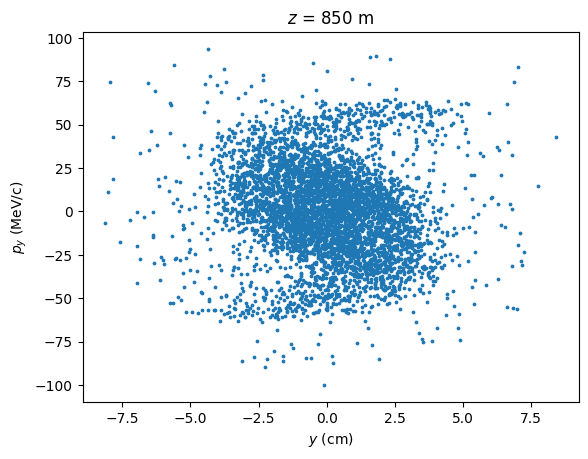

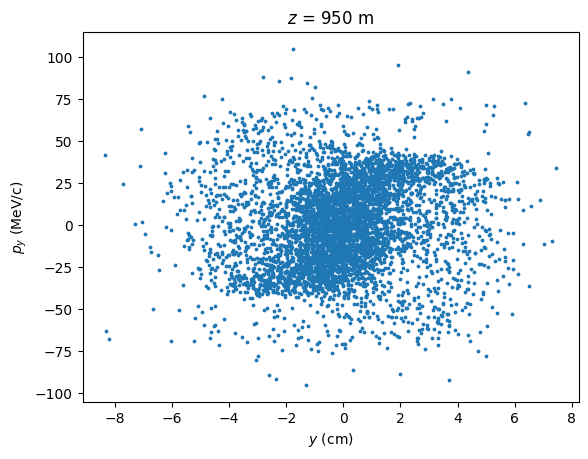

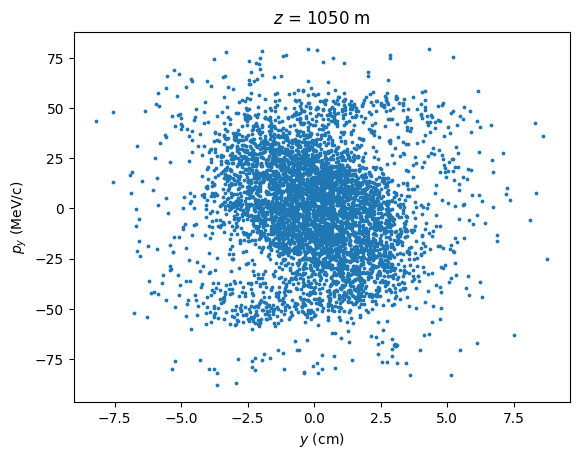

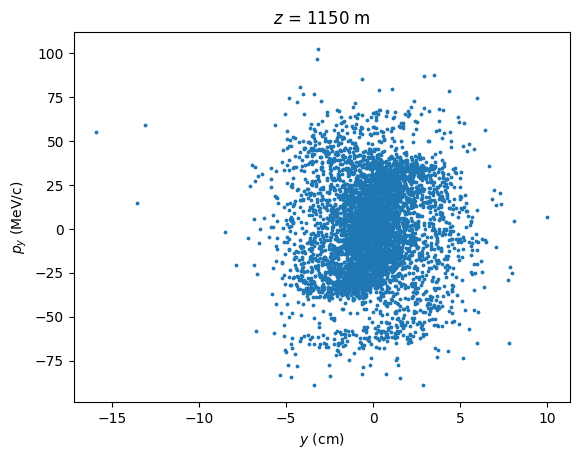

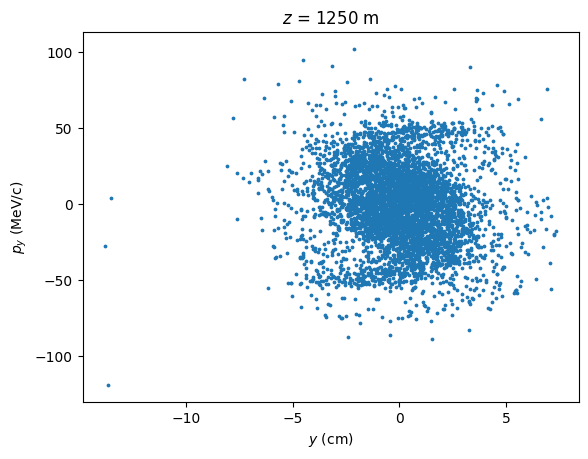

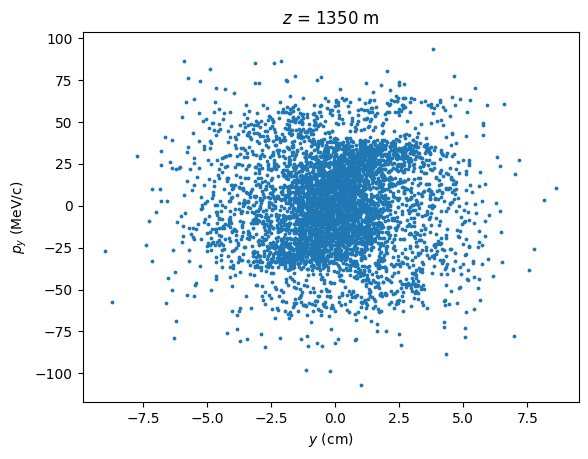

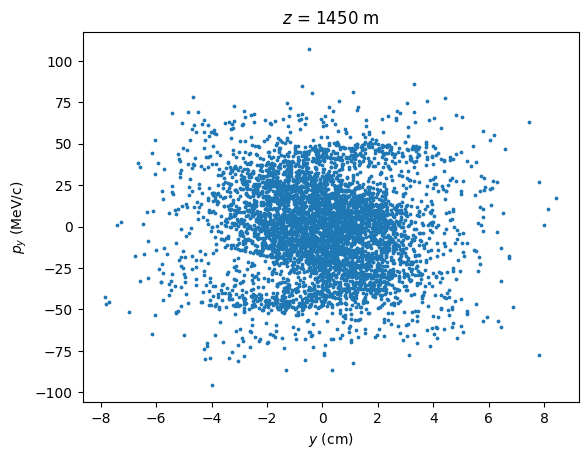

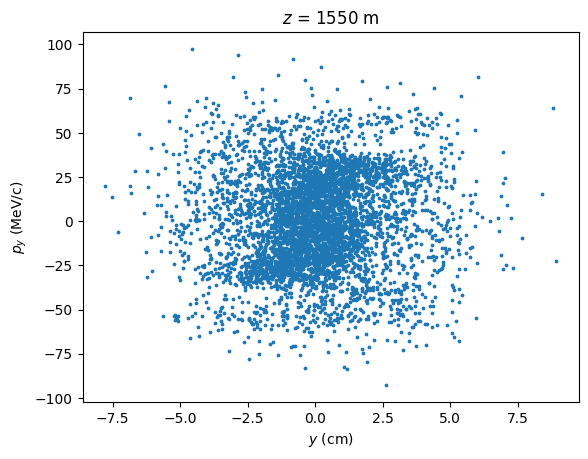

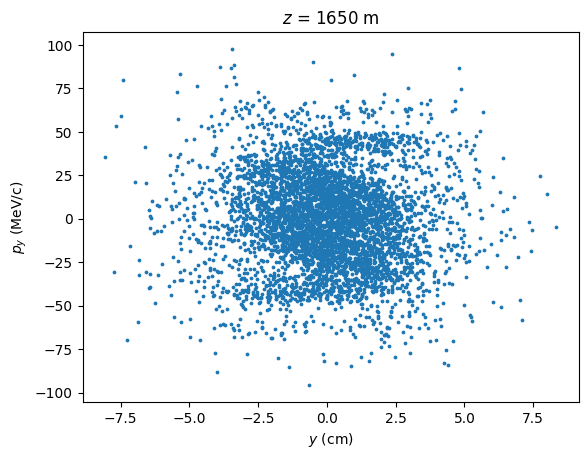

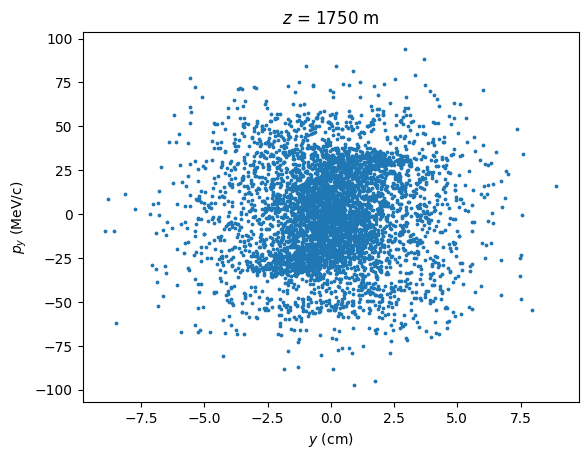

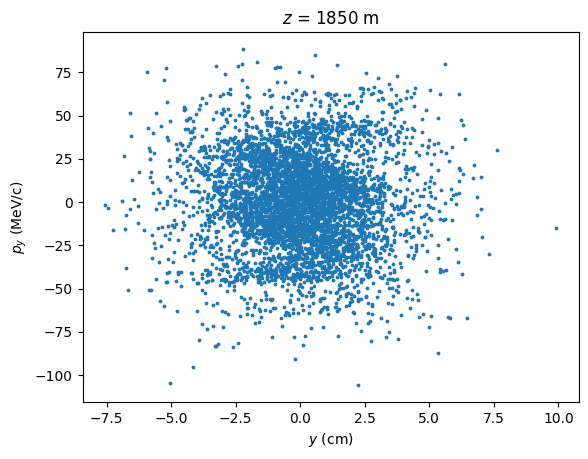

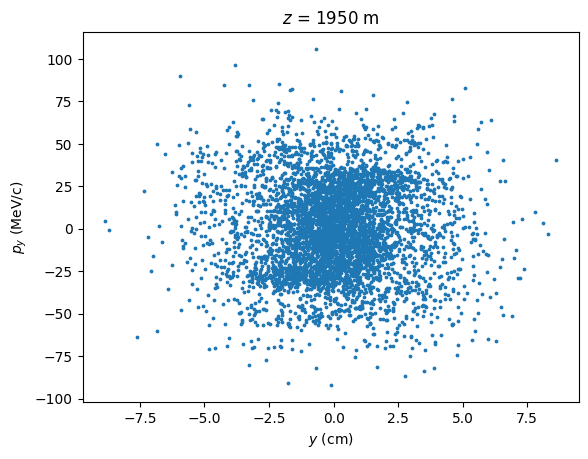

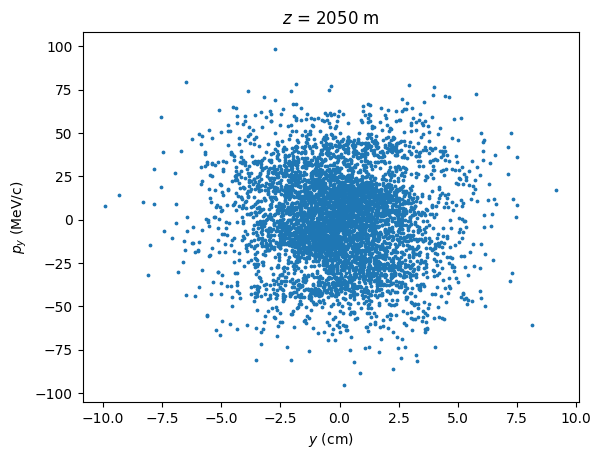

In [12]:
# Plot phase space (y) distribution for each detector location along beamline:
unique_z = np.unique(z_vals)
for i in range(len(unique_z)):
    temp_y = []; temp_py = []
    for j in range(len(z_vals)):
        if z_vals[j] == unique_z[i]:
            temp_y.append(y_vals[j])
            temp_py.append(py_vals[j])
    plt.scatter(temp_y,temp_py,s=3)
    plt.xlabel('$y$ (cm)')
    plt.ylabel('$p_y$ (MeV/c)')
    plt.title(f'$z$ = {int(unique_z[i])} m')
    plt.show()